In [1]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.4 MB/s 
     |████████████████████████████████| 4.7 MB 31.8 MB/s 
     |████████████████████████████████| 1.3 MB 47.4 MB/s 
     |████████████████████████████████| 120 kB 54.1 MB/s 
     |████████████████████████████████| 6.6 MB 53.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=0db3f87d9fccd7b1153b4890f36fd15e50d2b9cff7aa62da9af72f65cb4abe83
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [2]:
from google.colab import drive
drive.mount('/content/drive')
from sentence_transformers import SentenceTransformer, models, util
import nltk
nltk.download('punkt')
import glob
import os
from tqdm.notebook import tqdm_notebook
import pickle

Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
l_sents= []
sents = set()
for filename in tqdm_notebook(sorted(glob.glob(f'/content/drive/My Drive/corpus/*.txt'))):
    sents = set()
    with open(filename, 'r', encoding="utf8", errors='ignore') as in_file: 
        text = in_file.read().replace('\n', ' ')
    sents |= set(nltk.sent_tokenize(text))
    sents = list(sents)
    _, tail = os.path.split(filename)
    auth = tail.split("_")[0]
    l_sents.append((auth,sents,tail))

l_sents = list(l_sents)

  0%|          | 0/100 [00:00<?, ?it/s]

In [4]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
from os.path import exists

PATH = '/content/drive/My Drive/encodings/'
embeddings_l = []
authors_d = {}
authors_l = []
for i in tqdm_notebook(l_sents):
    filename = PATH + i[2] + '.pickle'
    if exists(filename): # load
        with open(filename, 'rb') as f:
            embeddings = pickle.load(f)
    else: # calculate and save
        embeddings = model.encode(i[1])
        with open(filename, 'wb') as f:
            pickle.dump(embeddings, f, pickle.HIGHEST_PROTOCOL)
    embeddings_l.append(embeddings)
    if not i[0] in authors_d:
        authors_d[i[0]] = len(authors_d)
    authors_l.append(authors_d[i[0]])
#embeddings_l = np.array(embeddings_l)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
authors_d

{'Anon': 0,
 'Barclay': 1,
 'Bennet': 2,
 'Blackmore': 3,
 'Braddon': 4,
 'Burnett': 5,
 'Cbronte': 6,
 'Chesterton': 7,
 'Conrad': 8,
 'Corelli': 9,
 'Dickens': 10,
 'Doyle': 11,
 'Eliot': 12,
 'Ford': 13,
 'Forster': 14,
 'Galsworthy': 15,
 'Gaskell': 16,
 'Gissing': 17,
 'Haggard': 18,
 'Hardy': 19,
 'James': 20,
 'Kipling': 21,
 'Lawrence': 22,
 'Lee': 23,
 'Lytton': 24,
 'Meredith': 25,
 'Morris': 26,
 'Schreiner': 27,
 'Stevenson': 28,
 'Thackeray': 29,
 'Trollope': 30,
 'Ward': 31,
 'Wcollins': 32,
 'Woolf': 33}

In [6]:
import numpy as np
from math import log
from sklearn.linear_model import LinearRegression

In [17]:
def box_counting(arr):
    ks = np.max(arr)
    norm = np.linalg.norm(arr)
    arr = (arr/ks) >=0.5
    x, y = arr.shape
    scales = range(1,y)[::-1]
    wykresx = []
    wykresy = []
    for k in scales:
        S = np.add.reduceat(np.add.reduceat(arr, np.arange(0, x, k), axis=0),np.arange(0, y, k), axis=1)
        wykresx.append( log(k) )
        wykresy.append( log(np.sum(S>0) ))
    wykresx = np.array(wykresx).reshape(-1,1)
    wykresy = np.array(wykresy)
    reg = LinearRegression().fit(wykresx, wykresy)
    return abs( reg.coef_[0] )


In [10]:
import random

fdimensions = []
lista = []
#seed = 2888
#a = random.sample(list(range(384)), 50)
#for i in range(len(embeddings_l)):
#    lista.append(embeddings_l[i][:,a])

for i in tqdm_notebook(embeddings_l):
    fdimensions.append(box_counting(i))

#for i in tqdm_notebook(embeddings_l):
#    fdimensions.append(box_counting(i))

  0%|          | 0/100 [00:00<?, ?it/s]

range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383, 0, -1)
range(383,

In [11]:
max(fdimensions)

1.5151313148140624

In [12]:
values = list(zip(fdimensions, authors_l))

In [13]:
box_plot = []
for i in values:
    if len(box_plot) > i[1]:
        box_plot[i[1]].append(i[0])
    else:
        lista = [i[0]]
        box_plot.append(lista)


In [14]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


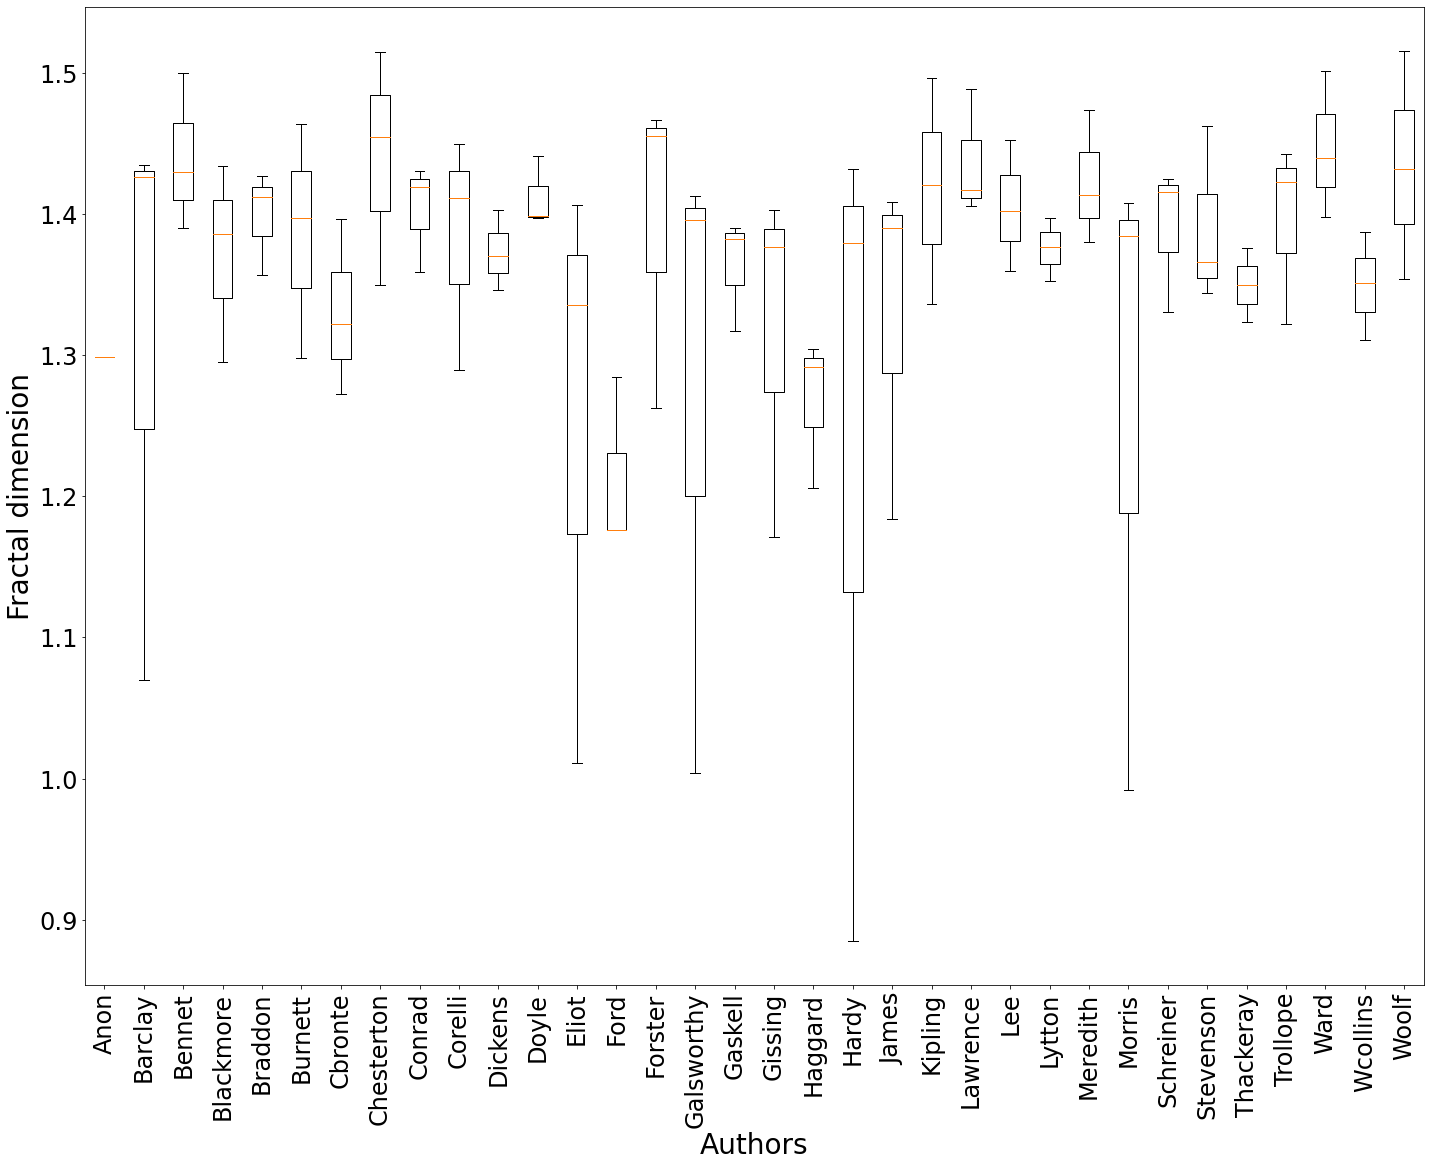

In [16]:

fig7, ax = plt.subplots()
ax.boxplot(box_plot)
plt.rcParams["figure.figsize"] = (24,18)
plt.rcParams.update({'font.size': 24})
ax.set_xticklabels(authors_d.keys(), rotation='vertical') 
plt.xlabel("Authors", fontsize=28)
plt.ylabel("Fractal dimension", fontsize=28)
plt.show()

***GLOVE BOX COUNTING***

In [18]:
import string

In [23]:
from sklearn.preprocessing import StandardScaler
import numpy
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import pandas as pd
from sklearn.datasets import load_digits
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
file = open("/content/drive/My Drive//vectors.txt", "r")

words = []
numbers = []
for line in file:
    tmp = line.split()
    if len(tmp) != 51:
        tmp.insert(0, ' ')
    words.append(tmp.pop(0))
    for i in range(len(tmp)):
        if tmp[i] == '.':
            tmp[i] = 0
        else:
            tmp[i] = float(tmp[i])
    numbers.append(tmp)
#    print(len(numbers), " ", len(tmp), " ", words[-1])
file.close()
print(len(words))
# numbers = numpy.array(numbers)

words_df = pd.DataFrame(numbers, index=words)
words_df = words_df[~words_df.index.duplicated(keep='first')]
words_df
# word_index = {w: i for (i, w) in enumerate(words)}
print(words_df.describe())
# numbers_f = []
# for i in numbers:
#     for j in range(len(word_index)):
#         if word_index[j] == i:
#             numbers_f = i

#numbers = numpy.array(numbers_f)

45408
                 0             1             2             3             4   \
count  14022.000000  14022.000000  14022.000000  14022.000000  14022.000000   
mean      -0.019757     -0.002807     -0.019000      0.020436      0.166648   
std        0.456095      0.466246      0.476108      0.450243      0.404736   
min       -1.851942     -2.412055     -2.074380     -1.471966     -1.556067   
25%       -0.323677     -0.322051     -0.324895     -0.291098     -0.096718   
50%       -0.009887     -0.013641     -0.013508     -0.013055      0.172664   
75%        0.288384      0.308448      0.300339      0.299339      0.431783   
max        1.604943      2.251804      1.754476      2.005872      2.426469   

                 5             6             7             8             9   \
count  14022.000000  14022.000000  14022.000000  14022.000000  14022.000000   
mean      -0.189493     -0.010187     -0.016445      0.066486      0.033756   
std        0.425350      0.459400      0.4796

In [ ]:
glove_sum = []
PATH = '/content/drive/My Drive/Colab Notebooks/glove/'
from os.path import exists
authors_sl = []
authors_wl = []
words_l = []

authors_d = {}
embeddings_l = []
for filename in (tqdm_notebook(sorted(glob.glob(f'/content/drive/My Drive/corpus/*.txt')))):
    filen = PATH + filename.rpartition('/')[2] + '.pickle'
    if False and exists(filen): # load
        with open(filen, 'rb') as f:
            zdania = pickle.load(f)
    else: # calculate and save
        sents = set()
        with open(filename, 'r', encoding="utf8", errors='ignore') as in_file: 
             text = in_file.read().replace('\n', ' ')
        sents |= set(nltk.sent_tokenize(text))
        sents = list(sents)
        _, tail = os.path.split(filename)
        auth = tail.split("_")[0]
        if not auth in authors_d:
            authors_d[auth] = len(authors_d)
        for s in range(len(sents)):
            sents[s] = sents[s].translate(str.maketrans('', '', string.punctuation)).split()
            for i in sents[s]:
                try:
                    words_l.append(words_df.loc[i])
                    authors_wl.append(authors_d[auth])
                except:
                    continue
        authors_sl.append(authors_d[auth])
        
        zdania = []
        for sen in sents:
            a = np.zeros(50)  
            for z in sen:
                try:
                    a += words_df.loc[z].to_numpy()
                except:
                    continue
            
            zdania.append(a)
        with open(filen, 'wb') as f:
            pickle.dump(zdania, f, pickle.HIGHEST_PROTOCOL)
    zdania = np.array(zdania)
    glove_sum.append(zdania)


  0%|          | 0/100 [00:00<?, ?it/s]

In [20]:
fdimensions_g = []
for i in tqdm_notebook(glove_sum):
    fdimensions_g.append(box_counting(i))

NameError: ignored

In [ ]:
values = list(zip(fdimensions, authors_l))

In [ ]:
box_plot_g = []
for i in values:
    if len(box_plot) > i[1]:
        box_plot_g[i[1]].append(i[0])
    else:
        lista = [i[0]]
        box_plot_g.append(lista)


In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


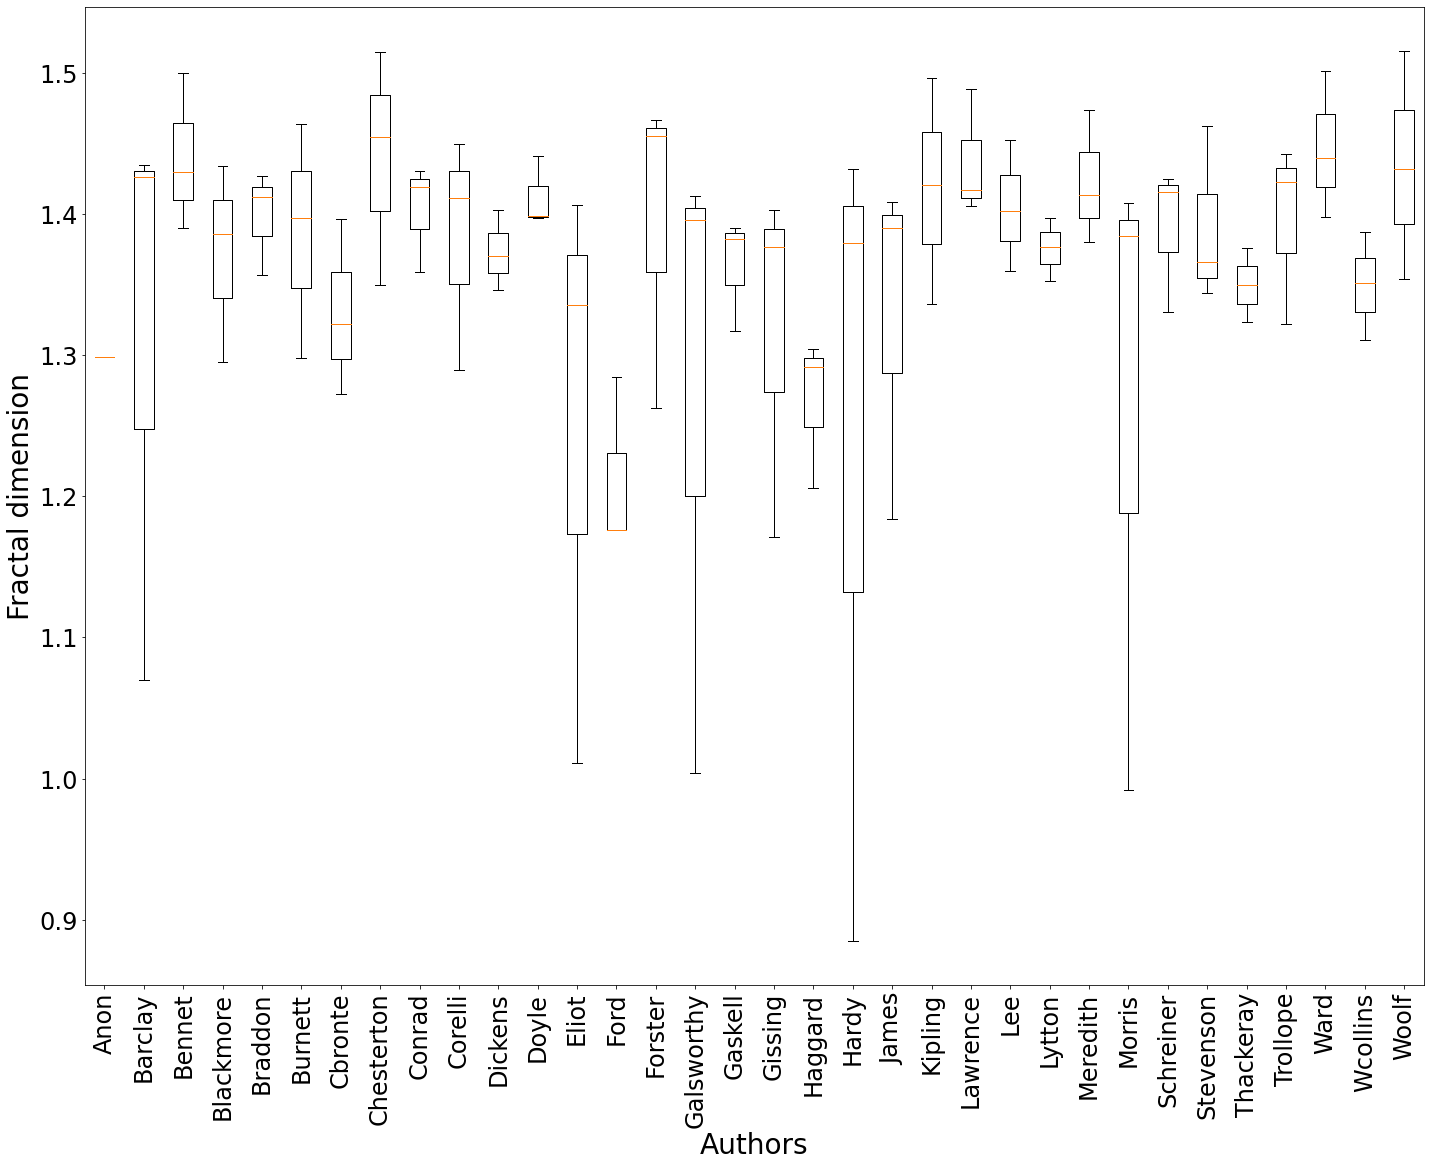

In [ ]:
fig6, ax2 = plt.subplots()
ax2.boxplot(box_plot_g)
plt.rcParams["figure.figsize"] = (24,18)
plt.rcParams.update({'font.size': 24})
ax2.set_xticklabels(authors_d.keys(), rotation='vertical') 
plt.xlabel("Authors", fontsize=28)
plt.ylabel("Fractal dimension", fontsize=28)
plt.show()